In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering


In [3]:
import time as time

import numpy as np
from scipy.ndimage.filters import gaussian_filter

import matplotlib.pyplot as plt

import skimage
from skimage.data import coins
from skimage.transform import rescale

from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering
from sklearn.utils.fixes import parse_version

# these were introduced in skimage-0.14
if parse_version(skimage.__version__) >= parse_version('0.14'):
    rescale_params = {'anti_aliasing': False, 'multichannel': False}
else:
    rescale_params = {}

<ipython-input-3-7a6cee1382b2>:4: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [4]:
from matplotlib import image
from matplotlib import pyplot as plt

In [5]:
def load_image(name, output=False):
    img = cv2.imread(path+'/'+name+'.png')
    #img = cv2.cvtColor(img ,cv2.COLOR_BGR2RGB)

    img = cv2.normalize(img, None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return img

In [ ]:
img = image.imread("/content/1_Left_2.jpg")

In [ ]:
# Resize it to 20% of the original size to speed up the processing
# Applying a Gaussian filter for smoothing prior to down-scaling
# reduces aliasing artifacts.
smoothened_eyes = gaussian_filter(img, sigma=2)
rescaled_eyes = rescale(smoothened_eyes, 0.2, mode="reflect",
                         **rescale_params)

X = np.reshape(rescaled_eyes, (-1, 1))


<ipython-input-118-963f3040a91b>:5: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0. Please use `channel_axis` instead.
  rescaled_eyes = rescale(smoothened_eyes, 0.2, mode="reflect",


In [ ]:
X.shape

(1600, 1)

In [ ]:
# Define the structure A of the data. Pixels connected to their neighbors.
connectivity = grid_to_graph(*rescaled_eyes.shape)


In [ ]:
print("Compute structured hierarchical clustering...")
st = time.time()
n_clusters = 10
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward',
                               connectivity=connectivity)
ward.fit(X)
label = np.reshape(ward.labels_, rescaled_eyes.shape)
print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)


Compute structured hierarchical clustering...
Elapsed time:  0.11676287651062012
Number of pixels:  1600
Number of clusters:  10


In [ ]:
label.shape

(40, 40, 1)

In [ ]:
label2 = label.reshape(40,40)

In [ ]:
label2.shape

(40, 40)

In [ ]:
def show_img_by_path(display_list):
    plt.figure(figsize=(5, 5))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        img_path = path+'/'+display_list[i]+'.png'
        image = plt.imread(img_path)

        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(image)
        plt.axis('off')
    plt.show()

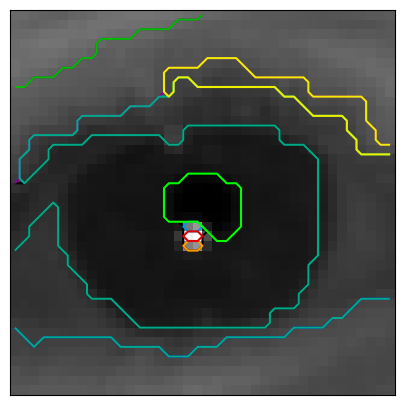

In [ ]:
# Plot the results on an image
plt.figure(figsize=(5, 5))
plt.imshow(rescaled_eyes, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label2 == l,
                colors=[plt.cm.nipy_spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()

В целом неплохо, надо будет посчитать метрики. Попробуем кминс.

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans

# загрузка изображения глаза
#img = cv2.imread("/content/1_Left_1.png")
#img = cv2.imread("/content/1_Left_2.jpg")

In [ ]:
# path
path = r'/content/1_Left_1.jpg'

# Reading an image in default mode
image = cv2.imread(path)

# Window name in which image is displayed
window_name = 'image'

In [ ]:
# преобразование изображения в массив пикселей
img_data = image.reshape((-1, 3))
img_data = np.float32(img_data)

# определение количества кластеров
k = 4

# создание объекта KMeans и обучение модели
kmeans = KMeans(n_clusters=k)
kmeans.fit(img_data)

# получение меток кластеров для каждого пикселя
labels = kmeans.labels_

# преобразование массива меток обратно в изображение
segmented_image = labels.reshape(img.shape[:2])


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
image

array([[[65, 65, 65],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [81, 81, 81]],

       [[65, 65, 65],
        [66, 66, 66],
        [66, 66, 66],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [80, 80, 80]],

       [[66, 66, 66],
        [67, 67, 67],
        [67, 67, 67],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [80, 80, 80]],

       ...,

       [[73, 73, 73],
        [74, 74, 74],
        [74, 74, 74],
        ...,
        [83, 83, 83],
        [82, 82, 82],
        [82, 82, 82]],

       [[74, 74, 74],
        [74, 74, 74],
        [74, 74, 74],
        ...,
        [83, 83, 83],
        [84, 84, 84],
        [85, 85, 85]],

       [[74, 74, 74],
        [74, 74, 74],
        [74, 74, 74],
        ...,
        [84, 84, 84],
        [85, 85, 85],
        [86, 86, 86]]], dtype=uint8)

In [ ]:
labels.shape

(40000,)

In [ ]:
label2 = labels.reshape(40000, 1)

In [ ]:
label2.shape

(40000, 1)

TypeError: ignored

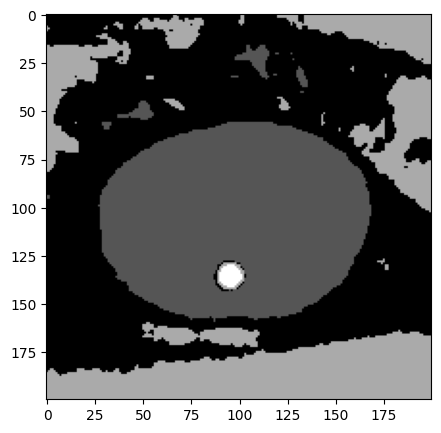

In [ ]:
# отображение результатов
# Plot the results on an image
plt.figure(figsize=(5, 5))
plt.imshow(segmented_image, cmap=plt.cm.gray)
for l in range(k):
    plt.contour(label2 == l,
                colors=[plt.cm.nipy_spectral(l / float(k)), ])
plt.xticks(())
plt.yticks(())
plt.show()